In [1]:
import pandas as pd
import numpy as np




In [2]:
df=pd.read_csv('C:\\Users\\kumar\\Desktop\\ML Progromming\\Kushal sir Mechine Learning\\Linear Regresion\\dfwin.csv')


df.shape
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [3]:
df.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

In [4]:
df=df.fillna(method='ffill')

In [5]:
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [6]:
df.shape

(1599, 12)

In [7]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [8]:
x=df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']].values
y=df['quality']

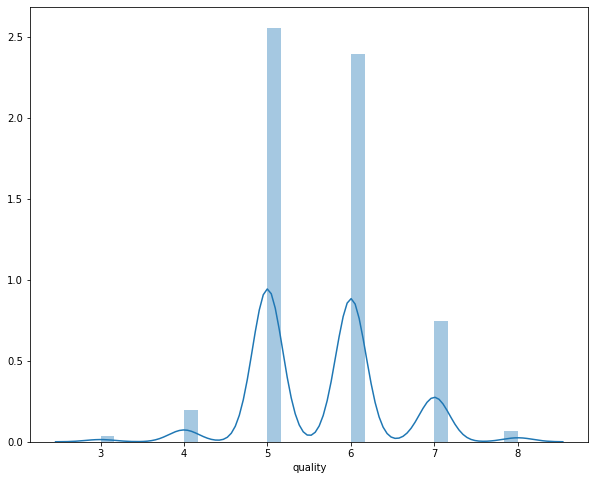

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.figure(figsize=(10,8))
sns.distplot(df['quality'])

In [10]:
from sklearn.model_selection import train_test_split



In [11]:
x_trian,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)


In [12]:
print(len(x_trian),len(x_test),len(y_train),len(y_test))

1119 480 1119 480


In [13]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_trian,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
print(lr.intercept_)

21.011050090687743


In [15]:
print(lr.coef_)

[ 2.02362546e-02 -1.21385635e+00 -9.84560496e-02  2.21024824e-02
 -1.89761853e+00  1.99433159e-03 -3.00386885e-03 -1.67249074e+01
 -3.97705407e-01  8.54179474e-01  2.67506351e-01]


In [16]:
y_predict=lr.predict(x_test)
df=pd.DataFrame({'Actual':y_test,'Predicted':y_predict})
df

,Actual,Predicted
1109,6,5.776983
1032,5,5.041862
1002,7,6.588130
487,6,5.384497
979,5,5.942356
...,...,...
801,5,5.503117
61,5,4.952331
431,5,5.184073
1210,6,5.565374


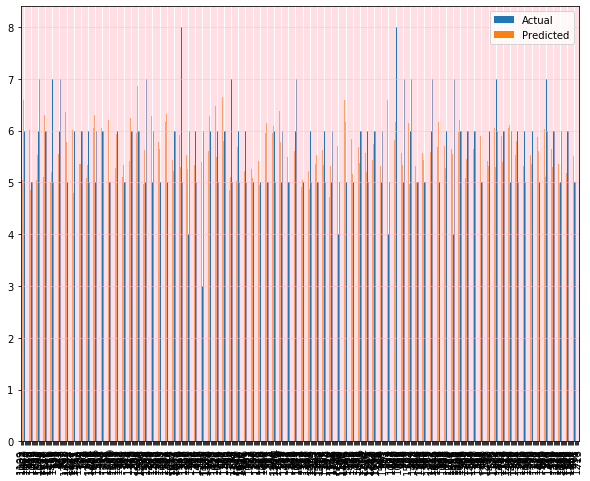

In [27]:
df.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-',linewidth='0.5',color = 'green')
plt.grid(which='major', linestyle='-',linewidth='0.5',color = 'pink')
plt.show()

In [32]:
from sklearn import metrics

In [37]:
print('Mean absolute error :',metrics.mean_absolute_error(y_test,y_predict))
print('mean squire error : ',metrics.mean_squared_error(y_test,y_predict))
print('roo mean square error : ',metrics.mean_squared_error(y_test,y_predict))

Mean absolute error : 0.4871262164597231
mean squire error :  0.40078036637557257
roo mean square error :  0.40078036637557257


In [40]:
df={'Name':['shanth','kumar','ravi'],'age':[10,20,58,]}

In [44]:
df=pd.DataFrame(data=df)
df

,Name,age
0,shanth,10
1,kumar,20
2,ravi,58
